## Dataset

In [19]:
import pandas as pd

df = pd.read_csv('heart.csv')

In [20]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [22]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Pre-processing

In [23]:
# delete lable column, axis = mehvar
x = df.drop('HeartDisease', axis='columns')
y = df['HeartDisease']

In [24]:
x.shape

(918, 11)

In [25]:
y.shape

(918,)

In [26]:
from sklearn.preprocessing import LabelEncoder

x = x.apply(LabelEncoder().fit_transform)

In [27]:
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,12,1,1,41,147,0,1,98,0,10,2
1,21,0,2,55,40,0,1,82,0,20,1
2,9,1,1,31,141,0,2,25,0,10,2
3,20,0,0,39,72,0,1,34,1,25,1
4,26,1,2,49,53,0,1,48,0,10,2


## Normalization

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, )

In [29]:
x_train.shape, x_test.shape

((734, 11), (184, 11))

## Transform dataframes

In [30]:
import numpy as np

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [31]:
x_train[0]

array([ 14,   1,   2,  22,  98,   1,   1, 116,   0,  18,   0])

In [32]:
x_test[0]

array([ 35,   0,   1,  41,  53,   0,   1, 105,   0,  10,   2])

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [34]:
x_train[0]

array([0.27083333, 1.        , 0.66666667, 0.33333333, 0.44343891,
       1.        , 0.5       , 0.98305085, 0.        , 0.34615385,
       0.        ])

In [35]:
x_test[0]

array([0.70833333, 0.        , 0.33333333, 0.62121212, 0.239819  ,
       0.        , 0.5       , 0.88983051, 0.        , 0.19230769,
       1.        ])

## Model definition

In [36]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()


model.add(keras.layers.Input(shape=(11,)))

model.add(keras.layers.Dense(units=128, activation='relu'))
# help to have lower complex dense and turn off some neurals randomly just in training
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Dense(units=1, activation='sigmoid'))

model.compile(optimizer = tf.optimizers.Adam(), loss=tf.losses.binary_crossentropy, metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1536      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [38]:
hist = model.fit(x_train, y_train, epochs=200, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/200
6/6 [==============================] - 2s 57ms/step - loss: 0.6850 - accuracy: 0.5572 - val_loss: 0.6562 - val_accuracy: 0.7609
Epoch 2/200
6/6 [==============================] - 0s 14ms/step - loss: 0.6428 - accuracy: 0.6785 - val_loss: 0.5971 - val_accuracy: 0.8261
Epoch 3/200
6/6 [==============================] - 0s 12ms/step - loss: 0.5699 - accuracy: 0.7602 - val_loss: 0.5128 - val_accuracy: 0.7880
Epoch 4/200
6/6 [==============================] - 0s 15ms/step - loss: 0.4883 - accuracy: 0.8025 - val_loss: 0.4718 - val_accuracy: 0.7609
Epoch 5/200
6/6 [==============================] - 0s 14ms/step - loss: 0.4328 - accuracy: 0.8065 - val_loss: 0.4636 - val_accuracy: 0.7826
Epoch 6/200
6/6 [==============================] - 0s 14ms/step - loss: 0.4384 - accuracy: 0.8283 - val_loss: 0.4633 - val_accuracy: 0.7772
Epoch 7/200
6/6 [==============================] - 0s 11ms/step - loss: 0.4396 - accuracy: 0.8270 - val_loss: 0.4095 - val_accuracy: 0.8152
Epoch 8/200
6/6 [===

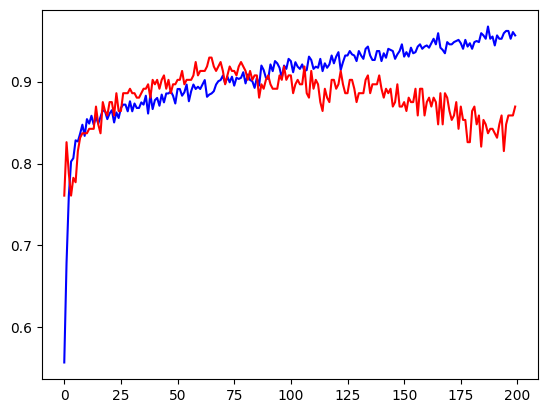

In [39]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'], color='blue')
plt.plot(hist.history['val_accuracy'], color='red')

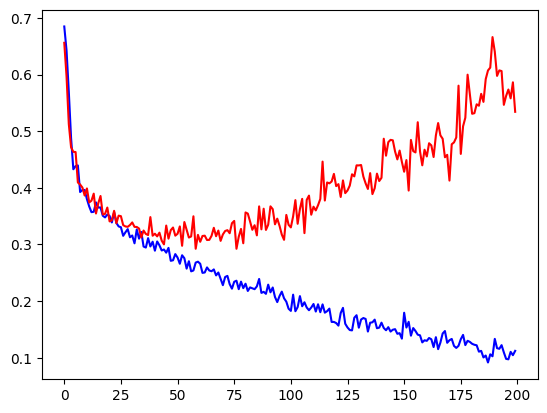

In [40]:
plt.plot(hist.history['loss'], color='blue')
plt.plot(hist.history['val_loss'], color='red')

## bias and variance must be complete for fixing overfit matter